## Basics of Tensorflow

In [1]:
import tensorflow as tf

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Simple tensorflow program
x=tf.constant(3,name='x')
y=tf.constant(4,name='y')
f=x*x*y+y+2
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(f.eval())
    sess.close()

42


In [3]:
#here we will compute the loss of (yHat-y)**2
yHat=tf.constant(36,name='yHat') # a constant
y=tf.constant(39,name='y') # again another constant with a name
loss=tf.Variable((yHat-y)**2,name='loss') #our loss functionn
init=tf.global_variables_initializer() # initialzing the variables
with tf.Session() as sess: #starting session with context
    sess.run(init) #running the init node
    print(sess.run(loss))
    sess.close()

9


In [4]:
#Another example
a=tf.constant(3)
b=tf.constant(5)
c=tf.multiply(a,b)
with tf.Session() as sess:
    print(sess.run(c))
    sess.close()

15


In [5]:
#here we will discuss the placeholders in which we can pass the values later
x=tf.placeholder(tf.int64,name='yHat')
with tf.Session() as sess:
    print(sess.run(x**2,feed_dict={x:36}))
    sess.close()

1296


## Linear Function

In [6]:
#here will calcluate the value of z=WX+b
def linear_func():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    import numpy as np
    np.random.seed(1)
    
    X=np.random.randn(3,1)
    W=np.random.randn(4,3)
    b=np.random.randn(4,1)
    
    Y=tf.add(tf.matmul(W,X),b)
    
    with tf.Session() as sess:
        result=sess.run(Y)
        sess.close()
    return(result)

In [7]:
linear_func()

array([[-2.15657382],
       [ 2.95891446],
       [-1.08926781],
       [-0.84538042]])

In [8]:
def sigmoid_func(Z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    X=tf.placeholder(tf.float64,name='X')
    sigmoid=tf.sigmoid(X)
    with tf.Session() as sess:
        result=sess.run(sigmoid,feed_dict={X:Z})
    return result

In [9]:
print(sigmoid_func(0))
print(sigmoid_func(12))

0.5
0.9999938558253978


In [10]:
def compute_cost(logits,labels):
     
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    Z=tf.placeholder(tf.float64,name='Z')
    y=tf.placeholder(tf.float64,name='y')
    cost=tf.nn.sigmoid_cross_entropy_with_logits(logits=Z,labels=y)
    with tf.Session() as sess:
        result=sess.run(cost,feed_dict={Z:logits,y:labels})  
    return result

In [11]:
import numpy as np
logits = sigmoid_func(np.array([0.2, 0.4, 0.7, 0.9]))
cost = compute_cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.00538722 1.03664083 0.41385432 0.39956614]


In [12]:
def one_hot_encoder(givenLabel,givenDepth):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    C=tf.placeholder(tf.int32,name="depth")
    one_hot=tf.one_hot(indices=givenLabel,depth=C,axis=0)
    with tf.Session() as sess:
        one_hot_encoded=sess.run(one_hot,feed_dict={C:givenDepth})
    return one_hot_encoded


In [13]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_encoder(labels,4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [14]:
def ones(order):
    z=tf.placeholder(tf.int32,name="order")
    ones_matrix=tf.ones(z)
    with tf.Session() as sess:
        result=sess.run(ones_matrix,feed_dict={z:order})
    return result

def zeros(order):
    y=tf.placeholder(tf.int32,name="order")
    zeros_matrix=tf.zeros(y)
    with tf.Session() as sess:
        result=sess.run(zeros_matrix,feed_dict={y:order})
    return result

In [15]:
print ("ones = " + str(ones([3])))
print ("zeros = " + str(zeros([3])))

ones = [1. 1. 1.]
zeros = [0. 0. 0.]


## 2 - Building your first neural network in tensorflow

### SIGNS DATASET

In [16]:
def load_dataset():
    import numpy as np
    import h5py

     # Loading the data (cat/non-cat)
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [17]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Original Datasets shape are
number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080,)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120,)


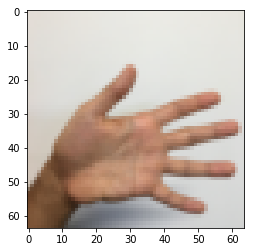

In [18]:
# Example of a picture
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
plt.imshow(X_train_orig[index])
print("Original Datasets shape are")
print("number of training examples = " + str(X_train_orig.shape[0]))
print("number of test examples = " + str(X_test_orig.shape[0]))
print("X_train shape: " + str(X_train_orig.shape))
print("Y_train shape: " + str(Y_train_orig.shape))
print("X_test shape: " + str(X_test_orig.shape))
print("Y_test shape: " + str(Y_test_orig.shape))

In [19]:
#Reshaping
X_train_flatten=X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten=X_test_orig.reshape(X_test_orig.shape[0],-1).T
#Standardzing
X_train=X_train_flatten/255
X_test=X_test_flatten/255
#One Hot Encoding
Y_train=one_hot_encoder(Y_train_orig,6)
Y_test=one_hot_encoder(Y_test_orig,6)
print("New Shapes are")
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

New Shapes are
number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [20]:
def random_mini_batches(X, Y,seed, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### Creating Placeholders

In [21]:
def placeholders(n_x,n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """
    X=tf.placeholder(tf.float32,[n_x, None],name='X')
    Y=tf.placeholder(tf.float32,[n_y, None],name='Y')
    
    return X,Y

In [22]:

X, Y = placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_4:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_3:0", shape=(6, ?), dtype=float32)


### Initialzing The Parameters

In [23]:
def initialize_params():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    W1=tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1=tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2=tf.get_variable("W2",[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2=tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer())
    W3=tf.get_variable("W3",[6,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3=tf.get_variable("b3",[6,1],initializer=tf.zeros_initializer())
    
    params={"W1":W1,"b1":b1,"W2":W2,"b2":b2,"W3":W3,"b3":b3}
    
    return params

In [24]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters=initialize_params()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### Forward Propagation

In [25]:
def forward_propagation(X,params):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    Z1=tf.add(tf.matmul(params["W1"],X),params["b1"])
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(params["W2"],A1),params["b2"])
    A2=tf.nn.relu(Z2)
    Z3=tf.add(tf.matmul(params["W3"],A2),params["b3"])    
    
    return Z3

In [26]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=placeholders(12288,6)
    parameters=initialize_params()
    Z3=forward_propagation(X,parameters)
print(Z3)

Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### Compute Cost

In [27]:
def compute_cost_tf(Z3,Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    #For fittingg the below func
    logits=tf.transpose(Z3)
    labels=tf.transpose(Y)
    
    cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [28]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=placeholders(12288,6)
    parameters=initialize_params()
    Z3=forward_propagation(X,parameters)
    cost=compute_cost_tf(Z3,Y)
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [1]:
def next_batch(mini_batch_size, data, labels):

    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:mini_batch_size]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

### The Model With BackProp

In [1]:
from tensorflow.python.framework import ops
import math
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.0001,num_epoch=10000,minibatch_size=64,print_cost=True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    #Housekeeping Tasks
    ops.reset_default_graph()
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3
    #Taking All The Shapes
    (n_x,m)=X_train.shape
    (n_y)=Y_train.shape[0]
    
    #Now Placeholders
    X,Y=placeholders(n_x,n_y)
    
    #Now Initialization of Weights
    parameters=initialize_params()
    
    #Forward Prop
    Z3=forward_propagation(X,parameters)
    
    #Now The Cost
    cost=compute_cost_tf(Z3,Y)
    
    #Now the optimizer
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=0.98,beta2=0.999,epsilon=1e-08,name="Adam").minimize(cost)
    
    #Initializer
    init=tf.global_variables_initializer()
    
    #Starting The Session
    costs=[]
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epoch):
            epoch_cost=0
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost+=minibatch_cost/num_minibatches
            
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
            # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
            
        #Saving The Parameters
        parameters=sess.run(parameters)
        #Now Performing Predictions
        pred=tf.equal(tf.argmax(Z3),tf.argmax(Y))
        #Now Accuracy
        accuracy = tf.reduce_mean(tf.cast(pred, "float"))
        print("Training Accuracy : ",accuracy.eval({X:X_train,Y:Y_train}))
        print("Testing Accuracy : ",accuracy.eval({X:X_test,Y:Y_test}))

        return parameters
        


E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

parameters = model(X_train, Y_train, X_test, Y_test)

NameError: name 'X_train' is not defined

In [31]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction


In [32]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


Your algorithm predicts: y = 2


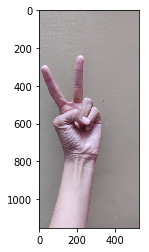

In [33]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "two.jpeg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))